# Logistic Regression

# Hypothesis

Sigmoid Function , $h_\theta (x) = \frac{1}{1+e^{-\theta^Tx}}$ , $p(y=1|_{x;\theta})$

# Cost Function

$J(\theta) = \frac{1}{m} \sum \limits _{i=1} ^{m} Cost(h_\theta(x^{(i)}),y^{(i)})$

$J(\theta) = -\frac{1}{m} [\sum \limits _{i=1} ^{m} y^{(i)}\log h_\theta(x^{(i)}) + (1-y^{(i)}) \log (1 -  h_\theta(x^{(i)}))]$

# Goal

$min  J(\theta)$

# Gradient Descent

Repeat {
    $\theta_j := \theta_j - \alpha \frac{1}{m} \sum \limits _{i=1} ^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j ^{(i)} $
}

In [40]:
def LogR_predictProbability (x,vtheta):
    assert vtheta.shape[0] == 1
    Z = np.dot (x,vtheta.T)
    return 1 / (1 + np.exp (-Z))

def LR_initVTheta (n_variables,type_init='random'):
    """
    Inicializacion de theta, 
    n_variables es el número de variables que se usarán en la regresión lineal
    """
    if type_init == 'random':
        return np.random.randn (1 , n_variables + 1)
    else:
        return np.zeros((1,n_variables +1))
    
def LR_getXMatrix (x):
    """
    Obtener matriz X para posterior pocesamiento, se añade una columna de '1'
    X es la matriz con las muestras
    """
    m = x.shape[0] # Número de muestras
    Ones = np.ones ((1,m)).T
    return np.insert (x,0,1, axis=1)


def LogR_CostFunctionV2 (theta,x,y):
    theta = np.array (theta).reshape (1,len(theta))
    y = np.array (y).reshape (len(y),1)
    prediction = LogR_predictProbability (x,theta)
    m = prediction.shape [0]
    assert prediction.shape[1] == 1
    assert y.shape[1] == 1
    assert prediction.shape[0] == y.shape[0]
    epsilon = 1e-10   # Incluido para evitar divisiones por 0
    J = - ( 1 / m) * ( np.dot(y.T, np.log(prediction+epsilon)) + np.dot((1-y).T, np.log(1-prediction+epsilon)))
    J = np.squeeze (J)
    assert J.shape == ()
    return J

def LogR_CostFunction (vtheta,X,y):
    prediction = LogR_predictProbability (X,vtheta)
    m = prediction.shape [0]
    assert prediction.shape[1] == 1
    assert y.shape[1] == 1
    assert prediction.shape[0] == y.shape[0]
    epsilon = 1e-10   # Incluido para evitar divisiones por 0
    J = - ( 1 / m) * ( np.dot(y.T, np.log(prediction+epsilon)) + np.dot((1-y).T, np.log(1-prediction+epsilon)))
    J = np.squeeze (J)
    assert J.shape == ()
    return J

def LogR_CalculateGradsV2 (theta,X,Y):
    theta = np.array (theta).reshape (1,len(theta))
    Y = np.array (y).reshape (len(y),1)
    prediction = LogR_predictProbability (X,theta)
    m = prediction.shape [0]
    grads =  (1/m) * np.dot ((prediction-Y).T,X)
    return grads
def LogR_CalculateGradsV3 (theta,X,Y,lambd=0.0):
    theta = np.array (theta).reshape (1,len(theta))
    Y = np.array (Y).reshape (len(Y),1)
    prediction = LogR_predictProbability (X,theta)
    print ('LogR_CalculateGradsV3,prediction',prediction[0:5])
    print ('LogR_CalculateGradsV3,x',X[0:5])
    print ('LogR_CalculateGradsV3,y',Y[0:5])
    m = prediction.shape [0]
    regularization = (lambd / m ) * theta
    regularization [0] [0]= 0    #Theta 0 no tiene regularization
    print ('LogR_CalculateGradsV3, regularization',regularization)
    grads =  (1/m) * np.dot ((prediction-Y).T,X) + regularization
    print ('LogR_CalculateGradsV3, grads',grads[0][0:5])
    return grads


def LogR_CalculateGrads (prediction,Y):
    m = prediction.shape [0]
    grads =  (1/m) * np.dot ((prediction-Y).T,X)
    return grads


def LR_UpdateThetas (vtheta,m,vgrads,learning_rate=1e-2):
    vtheta = vtheta - learning_rate * vgrads
    return vtheta

from tqdm import tqdm

def run_experiment (X,Y,vtheta,experiment_parameters):
    iterations = []
    for iteration in range(1,len(experiment_parameters['learning_rate'])+1):
        lr = experiment_parameters['learning_rate'][iteration-1]
        vtheta_iter = np.copy (vtheta)
        costs = []
        for i in tqdm(range (experiment_parameters['steps']),desc='LR = ' + str(lr)):
            prediction = LogR_predictProbability (X, vtheta_iter)
            cost = LogR_CostFunction (vtheta_iter,X,Y)
            costs.append (cost)
            vgrads = LogR_CalculateGrads (prediction,Y)
            vtheta_iter = LR_UpdateThetas (vtheta_iter,m,vgrads,learning_rate=lr)
        iterations.append ((costs,vtheta_iter))
    return iterations 

def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    vgrads = (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)
    return vgrads

In [2]:
import pandas as pd

def UTIL_FeatureNormalization (X,debug=False):
    # X is a numpy array
    df = pd.DataFrame (X)
    if debug:
        print('Input Data',df.head())
        print ('Input describe ',df.describe ())
    df_norm = (df - df.mean()) / df.std ()
    if debug:
        print('Output Data',df_norm.head())
    return df_norm.values,df.mean (), df.std ()


# Visualizing the data

           0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


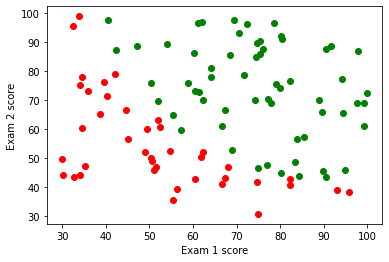

In [3]:
# Leer los datos y visualizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dataset =pd.read_csv('ex2data1.txt', sep=',',header=None)  #Exam 1 score, Exam 2 score , Admited (1,0)
print (dataset.head())
mask_approved = dataset.values[:,2] == 1
mask_failed = dataset.values[:,2] == 0
scores_approved = dataset.values [mask_approved,:]
scores_failed = dataset.values [mask_failed,:]

scores_approved_exam1 = scores_approved[:,0:1].reshape (1,scores_approved.shape[0])
scores_approved_exam2 = scores_approved[:,1:2].reshape (1,scores_approved.shape[0])

data_approved = {'a': scores_approved_exam1,
                 'b': scores_approved_exam2
       }

scores_failed_exam1 = scores_failed[:,0:1].reshape (1,scores_failed.shape[0])
scores_failed_exam2 = scores_failed[:,1:2].reshape (1,scores_failed.shape[0])

data_failed = {'a': scores_failed_exam1,
                 'b': scores_failed_exam2
       }

plt.scatter('a', 'b', data=data_approved,color='g')
plt.scatter('a', 'b', data=data_failed,color='r')
                                                       
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [4]:

X = dataset.values[:,0:2]
X, X_mean, X_std = UTIL_FeatureNormalization (X)
Y = dataset.values[:,2:3]
n = X.shape [1]
m = X.shape [0]
vtheta = LR_initVTheta (n,type_init='zeros')
X = LR_getXMatrix (X)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

experiment_parameters = {'learning_rate' : [0.01,0.015,0.02,0.025,0.03],
                         'steps': 1000 }

print ('#Variables {}, #muestras {},X shape {}, Y shape {},Theta shape {} '.format(n,m,X.shape,Y.shape,vtheta.shape),flush=True)
iterations= run_experiment (X,Y,vtheta,experiment_parameters)

#Variables 2, #muestras 100,X shape (100, 3), Y shape (100, 1),Theta shape (1, 3) 


LR = 0.03: 100%|████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 21550.58it/s]


[[0.46660748 1.28609914 1.1531973 ]]
[[0.57996168 1.56610113 1.40862147]]
[[0.67009269 1.77665686 1.60304703]]
[[0.74530916 1.94584353 1.76082718]]
[[0.8098514  2.08743471 1.89386951]]


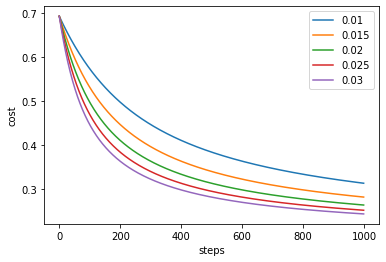

In [6]:
# Plotting costs

steps = np.arange (experiment_parameters['steps'])
i=0
vtheta=[]
for (costs,vtheta_iter) in iterations:
    #costs = iterations[iteration]
    print (vtheta_iter)
    vtheta = vtheta_iter
    plt.plot( steps , costs,label=str(experiment_parameters['learning_rate'][i]))
    i += 1

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

# Plotting Decission Boundary

[-1.82881309  1.75686481]
[ 1.5881118 -2.3640446]
65.64427405732314
19.458222275425072
66.22199808811695
18.582783039307344


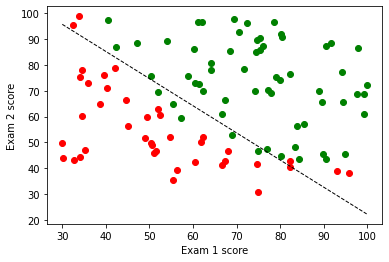

In [7]:
# Plot the data and the classification with the decision boundary. Data is normalized x -x.mean() / x.std ()

b=vtheta[0,0:1]
w1=vtheta[0,1:2]
w2=vtheta[0,2:3]
c = -b/w2
m = -w1/w2

df = pd.DataFrame (X)
#print (df.describe())
df_min = df.min()
df_max = df.max()
xmin, xmax = df_min[1], df_max[2]
ymin, ymax = df_min[2], df_max[2]
xd = np.array([xmin, xmax])
yd = m*xd + c

print (xd)
print (yd)
print (X_mean[0])
print (X_std[0])
print (X_mean[1])
print (X_std[1])

# Hay que tener en cuanta la normalización que hemos hecho inicialmente

plt.plot(xd*X_std[0] + X_mean[0], yd*X_std[1] + X_mean[1], 'k', lw=1, ls='--')

plt.scatter('a', 'b', data=data_approved,color='g')
plt.scatter('a', 'b', data=data_failed,color='r')
                                                       
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [8]:
# Accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


prediction = LogR_predictProbability (X,vtheta)
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0
accuracy = accuracy_score (Y.flatten(),prediction.flatten())
print (accuracy)

0.9


# Calculating parameters with function

In [9]:
data = dataset
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
    # filter out the applicants that got admitted
admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

X = np.c_[np.ones((X.shape[0], 1)), X]  # Adding 1's in first column
y = np.array(y).reshape (len(y),1)      # Row vector
theta = np.zeros((X.shape[1], 1))

In [10]:
from scipy.optimize import fmin_tnc

def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]

def fitv2(x, y, theta):
    opt_weights = fmin_tnc(func=LogR_CostFunctionV2, x0=theta,
                  fprime=LogR_CalculateGradsV2,args=(x, y.flatten()))
    return opt_weights[0]

In [11]:
parameters = fitv2(X, y, theta)
print(parameters)

[-25.16131854   0.20623159   0.20147149]


# Using sklearn -  Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression (penalty='l2')
model.fit (X,y.flatten())
predicted_classes = model.predict (X)
accuracy = accuracy_score (y.flatten(),predicted_classes)
parameters = model.coef_
print (accuracy)

0.89


# Regularized Logistic Regression

          0        1  2
0  0.051267  0.69956  1
1 -0.092742  0.68494  1
2 -0.213710  0.69225  1
3 -0.375000  0.50219  1
4 -0.513250  0.46564  1


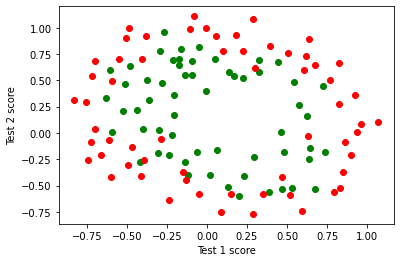

In [37]:
# Leer los datos y visualizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dataset =pd.read_csv('ex2data2.txt', sep=',',header=None)  #Test 1 score, Test 2 score , Acepted (1,0)
print (dataset.head())

mask_acepted = dataset.values[:,2] == 1
mask_failed = dataset.values[:,2] == 0
scores_acepted = dataset.values [mask_acepted,:]
scores_failed = dataset.values [mask_failed,:]

scores_acepted_test1 = scores_acepted[:,0:1].reshape (1,scores_acepted.shape[0])
scores_acepted_test2 = scores_acepted[:,1:2].reshape (1,scores_acepted.shape[0])

data_acepted = {'a': scores_acepted_test1,
                 'b': scores_acepted_test2
       }

scores_failed_test1 = scores_failed[:,0:1].reshape (1,scores_failed.shape[0])
scores_failed_test2 = scores_failed[:,1:2].reshape (1,scores_failed.shape[0])

data_failed = {'a': scores_failed_test1,
                 'b': scores_failed_test2
       }

plt.scatter('a', 'b', data=data_acepted , color='g')
plt.scatter('a', 'b', data=data_failed , color='r')
                                                       
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.show()


# Cost Function with regularization

$J(\theta) = -\frac{1}{m} [\sum \limits _{i=1} ^{m} y^{(i)}\log h_\theta(x^{(i)}) + (1-y^{(i)}) \log (1 -  h_\theta(x^{(i)}))] + \frac{\lambda}{2m} \sum \limits _{j=1} ^{n}\theta_j^2 $

# Gradient Descent

Repeat {
    $ [\frac{1}{m} \sum \limits _{i=1} ^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j ^{(i)}] + \frac{\lambda}{m}\theta_j  , where j >= 1$
}

In [38]:
def LogR_CostFunctionV3 (theta,x,y,lambd=0.0):          # Cost function con regularization
    theta = np.array (theta).reshape (1,len(theta))
    y = np.array (y).reshape (len(y),1)
    prediction = LogR_predictProbability (x,theta)
    m = prediction.shape [0]
    assert prediction.shape[1] == 1
    assert y.shape[1] == 1
    assert prediction.shape[0] == y.shape[0]
    epsilon = 1e-10   # Incluido para evitar divisiones por 0
    regularization = (lambd/(2*m)) * np.sum (theta[0][1:]**2)
    """
    allsum = 0
    for i in range (1,theta.shape[1]):
        allsum += theta[0][i]**2
    allsum *= (lambd/2*m)
    print (regularization)
    print (allsum)
    assert regularization == allsum
    """
    J = - ( 1 / m) * ( np.dot(y.T, np.log(prediction+epsilon)) + np.dot((1-y).T, np.log(1-prediction+epsilon))) + regularization
    J = np.squeeze (J)
    assert J.shape == ()
    print (J)
    return J

def run_experimentV3 (X,Y,vtheta,experiment_parameters):
    iterations = []
    for iteration in range(1,len(experiment_parameters['learning_rate'])+1):
        lr = experiment_parameters['learning_rate'][iteration-1]
        vtheta_iter = np.copy (vtheta)
        costs = []
        for i in tqdm(range (experiment_parameters['steps']),desc='LR = ' + str(lr)):
            prediction = LogR_predictProbability (X, vtheta_iter)
            cost = LogR_CostFunctionV3 (vtheta_iter.T,X,Y,experiment_parameters['lambda'])
            costs.append (cost)
            vgrads = LogR_CalculateGradsV3 (vtheta_iter.T,X,Y,experiment_parameters['lambda'])
            vtheta_iter = LR_UpdateThetas (vtheta_iter,m,vgrads,learning_rate=lr)
        iterations.append ((costs,vtheta_iter))
    return iterations 


In [41]:
X_orig = dataset.values[:,0:2]


#Creating new features x= [x1,x2,x1**2,x1*x2,x2**2,x1**3,x1**2 .... ]

degree = 6
X = None
index = 0
for i in range(degree+1):
    for j in  range (i+1):
        new_column =  X_orig[:,0:1]**(i-j) * X_orig[:,1:2]**(j)
        if X is None: 
            X = new_column
        else:
            X = np.concatenate((X,new_column),axis=1)   
        index += 1

n = X.shape [1]
m = X.shape [0]
#X, X_mean, X_std = UTIL_FeatureNormalization (X)
Y = dataset.values[:,2:3]
vtheta = LR_initVTheta (n-1,type_init='zeros') #Elimino 1 ,porque n incluye la columna de 1's
print (vtheta.shape)


experiment_parameters = {'learning_rate' : [0.02],
                         'lambda' : 0.9,
                         'steps': 1 }

print ('#Variables {}, #muestras {},X shape {}, Y shape {},Theta shape {} '.format(n,m,X.shape,Y.shape,vtheta.shape),flush=True)
iterations= run_experimentV3 (X,Y,vtheta,experiment_parameters)



(1, 28)
#Variables 28, #muestras 118,X shape (118, 28), Y shape (118, 1),Theta shape (1, 28) 


LR = 0.02: 100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.07it/s]

0.6931471803599452
LogR_CalculateGradsV3,prediction [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
LogR_CalculateGradsV3,x [[ 1.00000000e+00  5.12670000e-02  6.99560000e-01  2.62830529e-03
   3.58643425e-02  4.89384194e-01  1.34745327e-04  1.83865725e-03
   2.50892595e-02  3.42353606e-01  6.90798869e-06  9.42624411e-05
   1.28625106e-03  1.75514423e-02  2.39496889e-01  3.54151856e-07
   4.83255257e-06  6.59422333e-05  8.99809795e-04  1.22782870e-02
   1.67542444e-01  1.81563032e-08  2.47750473e-07  3.38066048e-06
   4.61305487e-05  6.29470940e-04  8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01  8.60107856e-03
  -6.35227055e-02  4.69142804e-01 -7.97681228e-04  5.89122275e-03
  -4.35092419e-02  3.21334672e-01  7.39785525e-05 -5.46363780e-04
   4.03513411e-03 -2.98012201e-02  2.20094970e-01 -6.86091891e-06
   5.06708697e-05 -3.74226408e-04  2.76382476e-03 -2.04120477e-02
   1.50751849e-01  6.36295342e-07 -4.69931780e-06  3.47065055e-05
  -2.56322636e-04  1.89305413

In [42]:
Vtheta updated [[-1.69491525e-04 -7.37892896e-04  5.67179240e-05 -3.88251574e-03
  -1.04582828e-03 -2.46793492e-03 -1.29977706e-03 -1.04878741e-03
  -1.07380522e-03 -1.36570397e-03 -3.66129830e-03 -4.72149636e-04
  -3.64532553e-03 -5.46464020e-04 -2.68873764e-03 -1.81838648e-03
  -1.17047542e-03 -1.21210972e-03 -1.94258051e-03 -8.88869051e-04
  -2.00790316e-03 -3.13285377e-03 -3.78698149e-04 -3.58897437e-03
  -2.25917869e-04 -3.25451753e-03 -3.15571623e-04 -2.54540270e-03]]

SyntaxError: invalid syntax (<ipython-input-42-8a0adfc91617>, line 1)

[[ 9.51541477e-01  3.92163806e-01  8.89909660e-01 -1.52254268e+00
  -5.57746208e-01 -9.05099336e-01  8.29671102e-03 -2.43446130e-01
  -2.42795796e-01 -1.93771455e-01 -1.15360095e+00 -5.43947906e-02
  -4.39461818e-01 -1.54788433e-01 -9.27642096e-01 -2.49253875e-01
  -1.52706635e-01 -5.79704790e-02 -1.92358559e-01 -1.84105030e-01
  -4.92374350e-01 -8.48731604e-01 -1.49762624e-03 -2.17899162e-01
  -2.60128359e-04 -2.38508232e-01 -7.41152994e-02 -8.38052341e-01]]


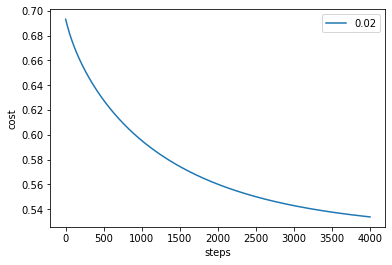

In [21]:
# Plotting costs

steps = np.arange (experiment_parameters['steps'])
i=0
vtheta=[]
for (costs,vtheta_iter) in iterations:
    #costs = iterations[iteration]
    print (vtheta_iter)
    vtheta = vtheta_iter
    plt.plot( steps , costs,label=str(experiment_parameters['learning_rate'][i]))
    i += 1

plt.xlabel('steps')
plt.ylabel('cost')
plt.legend()
plt.show()

In [22]:
# Accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


prediction = LogR_predictProbability (X,vtheta)
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0
accuracy = accuracy_score (Y.flatten(),prediction.flatten())
print (accuracy)

0.8220338983050848


In [23]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res
# define a function to plot the decision boundary
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

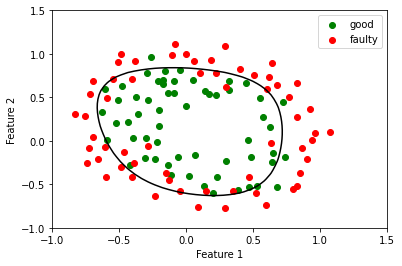

In [24]:
# Plot Decision boundary
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
#axes.scatter(components.loc[pos, 'feature 1'], components.loc[pos, 'feature 2'], color = 'r', marker='x', label='Faulty')
#axes.scatter(components.loc[neg, 'feature 1'], components.loc[neg, 'feature 2'], color = 'g', marker='o', label='Good')
#axes.legend(title='Legend', loc = 'best' )
axes.scatter('a', 'b', data=data_acepted , color='g')
axes.scatter('a', 'b', data=data_failed , color='r')

degree = 6

plotDecisionBoundary(vtheta.T, degree, axes)

In [19]:
print (vtheta)

[[ 1.14622505e+00  5.60311182e-01  1.17070704e+00 -1.89367007e+00
  -7.50905810e-01 -1.10990774e+00  4.78364083e-02 -3.20461130e-01
  -3.11389810e-01 -2.24723571e-01 -1.45598325e+00 -7.48695137e-02
  -5.58873090e-01 -2.12945168e-01 -1.16678740e+00 -2.99761468e-01
  -2.00531878e-01 -6.91794121e-02 -2.49562698e-01 -2.43230446e-01
  -6.11546517e-01 -1.07724541e+00 -3.10790890e-03 -2.77778007e-01
  -1.17642742e-03 -3.05438618e-01 -1.04594799e-01 -1.05809616e+00]]
